In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import os

In [2]:
def count_stats(df, dfHQ):
    dfLQ = df[~df.index.isin(dfHQ.index)]

    tp = len(dfLQ[dfLQ['color']=='red'])
    fp = len(dfLQ[dfLQ['color']=='green'])
    fn = len(dfHQ[dfHQ['color']=='red'])
    tn = len(dfHQ[dfHQ['color']=='green'])

    print(f'HQ (unconf.) \t\t {len(dfHQ)} ({fn})')
    print(f'LQ (unconf.) \t\t {len(dfLQ)} ({tp})')
    print(f'LQ relative size \t {len(dfLQ)/len(df)*100:.1f} %')
    
    sens = recall = tp/(tp+fn)
    spec = tn/(tn+fp)
    acc = (tp+tn)/(tp+tn+fp+fn)
    prec = tp/(tp+fp)
    f1 = (2*prec*recall)/(prec+recall)
    
    bold = '\033[1m'
    under = '\033[4m'
    end = '\033[0m'
    print('\nTEST 1')
    print(f'{bold}{under}Sensitivity (Recall){end} \t {recall*100:.1f} %')
    print(f'{bold}{under}Precision{end} \t\t {prec*100:.1f} %')
    print(f'{bold}{under}F1-score{end} \t\t {f1:.3f}')

    # test2

    tp = len(dfHQ[dfHQ['color']=='green'])
    fp = len(dfHQ[dfHQ['color']=='red'])
    fn = len(dfLQ[dfLQ['color']=='green'])
    tn = len(dfLQ[dfLQ['color']=='red'])
    
    sens = recall = tp/(tp+fn)
    spec = tn/(tn+fp)
    acc = (tp+tn)/(tp+tn+fp+fn)
    prec = tp/(tp+fp)
    f1 = (2*prec*recall)/(prec+recall)
    
    print('\nTEST 2')
    print(f'{bold}{under}Sensitivity (Recall){end} \t {recall*100:.2f} %')
    print(f'{bold}{under}Precision{end} \t\t {prec*100:.2f} %')
    print(f'{bold}{under}F1-score{end} \t\t {f1:.3f}')

# Zheng, J. et al. (2019) (10.1002/mgg3.748)

In [3]:
df = pd.read_excel('mgg3748-sup-0004-tables3.xlsx', skiprows = 1)
df['DP'] = df['Depth coverage']
df['AF'] = df['Heterozygous ratio %']/100
df['color'] = df['Validation result'].map({True:'green', False:'red'})

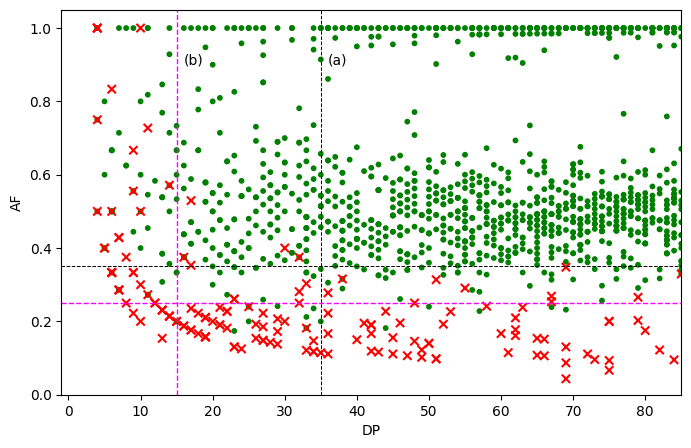

In [4]:
f, ax = plt.subplots(figsize=(8, 5))

dfPlot = df.copy()#df[df['Validation method'].str.contains('Sanger')].copy()
ax.scatter(dfPlot[~dfPlot['color'].isin(['red'])]["DP"].astype(int), 
           dfPlot[~dfPlot['color'].isin(['red'])]["AF"].astype(float), 
           c=dfPlot[~dfPlot['color'].isin(['red'])]["color"], s=10)
ax.scatter(dfPlot[dfPlot['color'] == 'red']["DP"].astype(int), 
           dfPlot[dfPlot['color'] == 'red']["AF"].astype(float), 
           c=dfPlot[dfPlot['color'] == 'red']["color"], marker='x')
ax.set_xlabel("DP")
ax.set_ylabel("AF")
ax.set_ylim(0, 1.05)
ax.axvline(35, lw=0.7, ls='--', color = 'black')
ax.axhline(0.35, lw=0.7, ls='--', color = 'black')
ax.axvline(15, lw=1, ls='--', color='magenta')
ax.axhline(0.25, lw=1, ls='--', color='magenta')
ax.text(36, 0.9, "(a)")#, fontsize='x-large', fontweight='bold')
ax.text(16, 0.9, "(b)")#, fontsize='x-large', fontweight='bold')

ax.set_xlim(-1, 85)
plt.savefig('fig-s4.png', dpi=600, bbox_inches='tight')

In [5]:
count_stats(df, df[(df['DP']>=35) & (df['AF']>=0.35)])

HQ (unconf.) 		 6939 (0)
LQ (unconf.) 		 662 (236)
LQ relative size 	 8.7 %

TEST 1
Sensitivity (Recall) 	 100.0 %
Precision 		 35.6 %
F1-score 		 0.526

TEST 2
Sensitivity (Recall) 	 94.22 %
Precision 		 100.00 %
F1-score 		 0.970


In [6]:
count_stats(df, df[(df['DP']>=35) & (df['AF']>=0.34)])

HQ (unconf.) 		 6976 (4)
LQ (unconf.) 		 625 (232)
LQ relative size 	 8.2 %

TEST 1
Sensitivity (Recall) 	 98.3 %
Precision 		 37.1 %
F1-score 		 0.539

TEST 2
Sensitivity (Recall) 	 94.66 %
Precision 		 99.94 %
F1-score 		 0.972


In [7]:
count_stats(df, df[(df['DP']>=20)])

HQ (unconf.) 		 7450 (176)
LQ (unconf.) 		 151 (60)
LQ relative size 	 2.0 %

TEST 1
Sensitivity (Recall) 	 25.4 %
Precision 		 39.7 %
F1-score 		 0.310

TEST 2
Sensitivity (Recall) 	 98.76 %
Precision 		 97.64 %
F1-score 		 0.982


In [8]:
count_stats(df, df[(df['DP']>=20) & (df['AF']>=0.2)])

HQ (unconf.) 		 7297 (47)
LQ (unconf.) 		 304 (189)
LQ relative size 	 4.0 %

TEST 1
Sensitivity (Recall) 	 80.1 %
Precision 		 62.2 %
F1-score 		 0.700

TEST 2
Sensitivity (Recall) 	 98.44 %
Precision 		 99.36 %
F1-score 		 0.989


In [9]:
count_stats(df, df[(df['DP']>=15) & (df['AF']>=0.25)])

HQ (unconf.) 		 7295 (30)
LQ (unconf.) 		 306 (206)
LQ relative size 	 4.0 %

TEST 1
Sensitivity (Recall) 	 87.3 %
Precision 		 67.3 %
F1-score 		 0.760

TEST 2
Sensitivity (Recall) 	 98.64 %
Precision 		 99.59 %
F1-score 		 0.991


## Panel-specific analysis

In [10]:
# for i in df['Sequence chemistry'].value_counts().index:
#     for j in df['Target capture panel'].value_counts().index:
    
#         f, ax = plt.subplots(figsize=(8, 5))
    
#         dfPlot = df[(df['Sequence chemistry'] == i) & (df['Target capture panel'] == j)].copy()
#         ax.scatter(dfPlot[~dfPlot['color'].isin(['red'])]["DP"].astype(int), 
#                    dfPlot[~dfPlot['color'].isin(['red'])]["AF"].astype(float), 
#                    c=dfPlot[~dfPlot['color'].isin(['red'])]["color"], s=10)
#         ax.scatter(dfPlot[dfPlot['color'] == 'red']["DP"].astype(int), 
#                    dfPlot[dfPlot['color'] == 'red']["AF"].astype(float), 
#                    c=dfPlot[dfPlot['color'] == 'red']["color"], marker='x')
#         ax.set_xlabel("DP")
#         ax.set_ylabel("AF")
#         ax.set_ylim(0, 1.05)
#         # ax.axvline(20, lw=0.7, ls='--')
#         # ax.axhline(0.2, lw=0.7, ls='--')
#         ax.axvline(35, lw=0.7, ls='--', color = 'black')
#         ax.axhline(0.35, lw=0.7, ls='--', color = 'black')
#         ax.axvline(15, lw=1, ls='--', color='magenta')
#         ax.axhline(0.25, lw=1, ls='--', color='magenta')
#         # ax.text(80, 0.97, "A", fontsize='x-large', fontweight='bold')
#         ax.text(36, 0.9, "(a)")#, fontsize='x-large', fontweight='bold')
#         ax.text(16, 0.9, "(b)")#, fontsize='x-large', fontweight='bold')
#         ax.set_xlim(-1, 630)#385)
#         plt.title(f'{i} / {j}')
#         plt.savefig(f'{i}-{j}-630.png', dpi = 600, bbox_inches = 'tight')
#         plt.show()

In [11]:
# for i in df['Sequence chemistry'].value_counts().index:
#     for j in df['Target capture panel'].value_counts().index:
    
#         f, ax = plt.subplots(figsize=(8, 5))
    
#         dfPlot = df[(df['Sequence chemistry'] == i) & (df['Target capture panel'] == j)].copy()
#         ax.scatter(dfPlot[~dfPlot['color'].isin(['red'])]["DP"].astype(int), 
#                    dfPlot[~dfPlot['color'].isin(['red'])]["AF"].astype(float), 
#                    c=dfPlot[~dfPlot['color'].isin(['red'])]["color"], s=10)
#         ax.scatter(dfPlot[dfPlot['color'] == 'red']["DP"].astype(int), 
#                    dfPlot[dfPlot['color'] == 'red']["AF"].astype(float), 
#                    c=dfPlot[dfPlot['color'] == 'red']["color"], marker='x')
#         ax.set_xlabel("DP")
#         ax.set_ylabel("AF")
#         ax.set_ylim(0, 1.05)
#         # ax.axvline(20, lw=0.7, ls='--')
#         # ax.axhline(0.2, lw=0.7, ls='--')
#         ax.axvline(35, lw=0.7, ls='--', color = 'black')
#         ax.axhline(0.35, lw=0.7, ls='--', color = 'black')
#         ax.axvline(15, lw=1, ls='--', color='magenta')
#         ax.axhline(0.25, lw=1, ls='--', color='magenta')
#         # ax.text(80, 0.97, "A", fontsize='x-large', fontweight='bold')
#         ax.text(36, 0.9, "(a)")#, fontsize='x-large', fontweight='bold')
#         ax.text(16, 0.9, "(b)")#, fontsize='x-large', fontweight='bold')
#         ax.set_xlim(-1, 85)
#         plt.title(f'{i} / {j}')
#         plt.savefig(f'{i}-{j}-85.png', dpi = 600, bbox_inches = 'tight')
#         plt.show()

In [12]:
for panel in ['HC', 'HD', '4.8M', 'C2181', 'BGI_Exo']:
    print(panel)
    dfPlot = df[(df['Target capture panel'] == panel)].copy()
    try:
        count_stats(dfPlot, dfPlot[(dfPlot['DP']>=15) & (dfPlot['AF']>=0.25)])
    except:
        print('Divisio by zero')
    print('-'*40)

HC
HQ (unconf.) 		 332 (0)
LQ (unconf.) 		 5 (0)
LQ relative size 	 1.5 %
Divisio by zero
----------------------------------------
HD
HQ (unconf.) 		 1567 (2)
LQ (unconf.) 		 65 (59)
LQ relative size 	 4.0 %

TEST 1
Sensitivity (Recall) 	 96.7 %
Precision 		 90.8 %
F1-score 		 0.937

TEST 2
Sensitivity (Recall) 	 99.62 %
Precision 		 99.87 %
F1-score 		 0.997
----------------------------------------
4.8M
HQ (unconf.) 		 2002 (1)
LQ (unconf.) 		 64 (34)
LQ relative size 	 3.1 %

TEST 1
Sensitivity (Recall) 	 97.1 %
Precision 		 53.1 %
F1-score 		 0.687

TEST 2
Sensitivity (Recall) 	 98.52 %
Precision 		 99.95 %
F1-score 		 0.992
----------------------------------------
C2181
HQ (unconf.) 		 2607 (11)
LQ (unconf.) 		 104 (65)
LQ relative size 	 3.8 %

TEST 1
Sensitivity (Recall) 	 85.5 %
Precision 		 62.5 %
F1-score 		 0.722

TEST 2
Sensitivity (Recall) 	 98.52 %
Precision 		 99.58 %
F1-score 		 0.990
----------------------------------------
BGI_Exo
HQ (unconf.) 		 787 (16)
LQ (unconf.) 

In [13]:
df[(df['Target capture panel'] == 'HD') & (df['DP']>=15) & (df['AF']>=0.25) & (df['color'] == 'red')]

,Sample ID,Gene_symbol,Gene_name,Ref Accession,Nucleic Acid Alternation,Amino Acid Alternation,Zygosity,Chr_location,Chromosome,Validation Zygosity,...,Variant size,Sequence chemistry,Target capture panel,Depth coverage,Heterozygous ratio %,GC content%,Validation result,DP,AF,color
5154,SD3562,MYH14,myosin heavy chain 14,NM_001077186,c.40C>T,p.Pro14Ser,Het,chr19:50713662,chr19,N,...,1,Hiseq2500,HD,32,37.50,70,False,32,0.3750,red
6867,SD4747,GJB2,gap junction protein beta 2,NM_004004,c.-23+1G>A,-,Het,chr13:20766921,chr13,N,...,1,BGISEQ-500,HD,17,52.94,47,False,17,0.5294,red


In [14]:
df[(df['DP']>=15) & (df['AF']>=0.25) & (df['color'] == 'red')]['DP'].min()

16

In [15]:
df[(df['DP']>=15) & (df['AF']>=0.25) & (df['color'] == 'red')]['DP'].max()

250

# Data from this work (10.1101/2024.04.19.590340)

In [16]:
df0 = pd.read_excel('save_data_article.xlsx')

In [17]:
count_stats(df0, df0[(df0['DP']>=35) & (df0['AF']>=0.35)])

HQ (unconf.) 		 738 (0)
LQ (unconf.) 		 1018 (5)
LQ relative size 	 58.0 %

TEST 1
Sensitivity (Recall) 	 100.0 %
Precision 		 0.5 %
F1-score 		 0.010

TEST 2
Sensitivity (Recall) 	 42.15 %
Precision 		 100.00 %
F1-score 		 0.593


In [18]:
count_stats(df0, df0[(df0['DP']>=30) & (df0['QUAL']>=30)])

HQ (unconf.) 		 1088 (0)
LQ (unconf.) 		 668 (5)
LQ relative size 	 38.0 %

TEST 1
Sensitivity (Recall) 	 100.0 %
Precision 		 0.7 %
F1-score 		 0.015

TEST 2
Sensitivity (Recall) 	 62.14 %
Precision 		 100.00 %
F1-score 		 0.766


In [19]:
count_stats(df0, df0[(df0['DP']>=20)])

HQ (unconf.) 		 1549 (1)
LQ (unconf.) 		 207 (4)
LQ relative size 	 11.8 %

TEST 1
Sensitivity (Recall) 	 80.0 %
Precision 		 1.9 %
F1-score 		 0.038

TEST 2
Sensitivity (Recall) 	 88.41 %
Precision 		 99.94 %
F1-score 		 0.938


In [20]:
count_stats(df0, df0[(df0['DP'] >= 20) & (df0['AF'] >= 0.3) & (df0['QUAL'] > 300)])

HQ (unconf.) 		 1357 (0)
LQ (unconf.) 		 399 (5)
LQ relative size 	 22.7 %

TEST 1
Sensitivity (Recall) 	 100.0 %
Precision 		 1.3 %
F1-score 		 0.025

TEST 2
Sensitivity (Recall) 	 77.50 %
Precision 		 100.00 %
F1-score 		 0.873


In [21]:
count_stats(df0, df0[(df0['DP'] >= 20) & (df0['AF'] >= 0.2) & (df0['QUAL'] >= 100)])

HQ (unconf.) 		 1546 (0)
LQ (unconf.) 		 210 (5)
LQ relative size 	 12.0 %

TEST 1
Sensitivity (Recall) 	 100.0 %
Precision 		 2.4 %
F1-score 		 0.047

TEST 2
Sensitivity (Recall) 	 88.29 %
Precision 		 100.00 %
F1-score 		 0.938


In [22]:
count_stats(df0, df0[(df0['DP']>=20) & (df0['AF']>=0.2)])

HQ (unconf.) 		 1547 (0)
LQ (unconf.) 		 209 (5)
LQ relative size 	 11.9 %

TEST 1
Sensitivity (Recall) 	 100.0 %
Precision 		 2.4 %
F1-score 		 0.047

TEST 2
Sensitivity (Recall) 	 88.35 %
Precision 		 100.00 %
F1-score 		 0.938


In [23]:
count_stats(df0, df0[(df0['DP'] >= 15) & (df0['AF'] >= 0.25)])

HQ (unconf.) 		 1672 (0)
LQ (unconf.) 		 84 (5)
LQ relative size 	 4.8 %

TEST 1
Sensitivity (Recall) 	 100.0 %
Precision 		 6.0 %
F1-score 		 0.112

TEST 2
Sensitivity (Recall) 	 95.49 %
Precision 		 100.00 %
F1-score 		 0.977


In [24]:
count_stats(df0, df0[(df0['QUAL'] >= 100)])

HQ (unconf.) 		 1735 (0)
LQ (unconf.) 		 21 (5)
LQ relative size 	 1.2 %

TEST 1
Sensitivity (Recall) 	 100.0 %
Precision 		 23.8 %
F1-score 		 0.385

TEST 2
Sensitivity (Recall) 	 99.09 %
Precision 		 100.00 %
F1-score 		 0.995
